Saving data_by_year.csv to data_by_year.csv
k = 1, accuracy = 0.650
k = 2, accuracy = 0.650
k = 3, accuracy = 0.650
k = 4, accuracy = 0.550
k = 5, accuracy = 0.600
k = 6, accuracy = 0.450
k = 7, accuracy = 0.550
k = 8, accuracy = 0.550
k = 9, accuracy = 0.700
k = 10, accuracy = 0.550
k = 11, accuracy = 0.650
k = 12, accuracy = 0.600
k = 13, accuracy = 0.650
k = 14, accuracy = 0.600
k = 15, accuracy = 0.600
k = 16, accuracy = 0.600
k = 17, accuracy = 0.500
k = 18, accuracy = 0.400
k = 19, accuracy = 0.450
k = 20, accuracy = 0.450


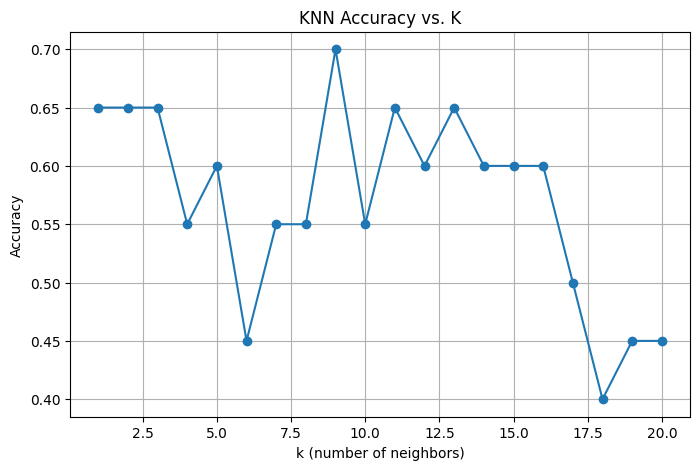


 Best k = 9

Classification Report:
              precision    recall  f1-score   support

       1920s       0.00      0.00      0.00         2
       1930s       0.50      1.00      0.67         2
       1940s       0.67      1.00      0.80         2
       1950s       1.00      0.50      0.67         2
       1960s       1.00      0.50      0.67         2
       1970s       0.50      0.50      0.50         2
       1980s       0.67      1.00      0.80         2
       1990s       1.00      1.00      1.00         2
       2000s       0.67      1.00      0.80         2
       2010s       1.00      0.50      0.67         2

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.66        20
weighted avg       0.70      0.70      0.66        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


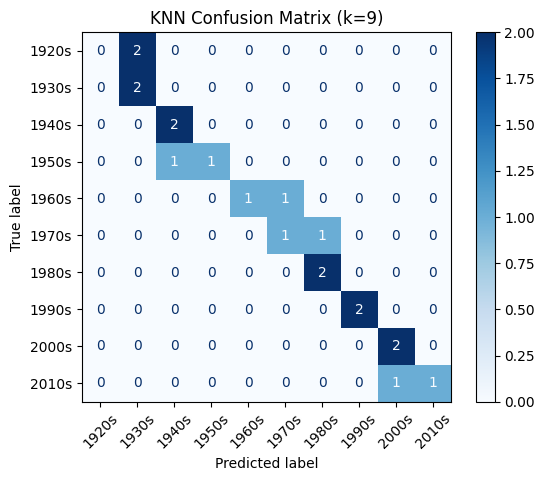

In [1]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Load dataset (uses uploaded file name)
df = pd.read_csv("data_by_year.csv")

# Create 'decade' label
df['decade'] = (df['year'] // 10) * 10
df['decade'] = df['decade'].astype(str) + 's'

# Define features and filtered decades
feature_columns = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

X = df[feature_columns]
y = df['decade']

# Remove rare decades (support < 5)
counts = y.value_counts()
valid_decades = counts[counts >= 5].index
df_filtered = df[df['decade'].isin(valid_decades)]

X = df_filtered[feature_columns]
y = df_filtered['decade']

# Train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try multiple K values (1 to 20)
accuracy_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    accuracy_scores.append(score)
    print(f"k = {k}, accuracy = {score:.3f}")

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracy_scores, marker='o')
plt.title("KNN Accuracy vs. K")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Use best k for final model
best_k = np.argmax(accuracy_scores) + 1
print(f"\n Best k = {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)

# Evaluate and plot confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(xticks_rotation=45, cmap="Blues")
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.show()

In [5]:
from sklearn.neighbors import NearestNeighbors

# Ask user to input a year
try:
    input_year = int(input("Enter a year (e.g., 2009): "))
except:
    print("Invalid input. Using 2010 as default.")
    input_year = 2010

# Convert year to decade
target_decade = (input_year // 10) * 10
target_decade_str = str(target_decade) + 's'

print(f"\nYou entered year {input_year}. Recommending songs from the {target_decade_str} decade.")

# Filter songs from the same decade
df_decade = df[df['decade'] == target_decade_str].copy()

if df_decade.empty or df_decade.shape[0] < 6:
    print(f"Not enough songs found in the {target_decade_str} decade for recommendation.")
else:
    print(f"Found {len(df_decade)} songs from the {target_decade_str} decade.")

    # Define audio features
    feature_columns = [
        'danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
    ]
    X_decade = df_decade[feature_columns]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_decade)

    # Fit Nearest Neighbors model
    nn_model = NearestNeighbors(n_neighbors=6)
    nn_model.fit(X_scaled)

    # Select a query song (you can later let user pick index)
    query_index = 0
    query_vector = X_scaled[query_index].reshape(1, -1)

    distances, indices = nn_model.kneighbors(query_vector)

    print(f"\nQuery song (index {query_index}) from {target_decade_str}:")
    print(df_decade.iloc[query_index][['year'] + feature_columns])

    print(f"\nTop 5 recommended songs from the same decade ({target_decade_str}):")
    for i in indices[0][1:]:  # skip the query song itself
        print(df_decade.iloc[i][['year'] + feature_columns])
        print("-----------")


Enter a year (e.g., 2009): 2010

You entered year 2010. Recommending songs from the 2010s decade.
Found 10 songs from the 2010s decade.

Query song (index 0) from 2010s:
year                      2010
danceability          0.572488
energy                0.681778
loudness             -6.909904
speechiness           0.081031
acousticness          0.242687
instrumentalness      0.082981
liveness              0.199701
valence               0.520895
tempo               123.570215
Name: 89, dtype: object

Top 5 recommended songs from the same decade (2010s):
year                      2014
danceability          0.589948
energy                0.648795
loudness              -7.06744
speechiness           0.084061
acousticness          0.249313
instrumentalness       0.07657
liveness              0.191822
valence               0.463049
tempo               122.305263
Name: 93, dtype: object
-----------
year                      2012
danceability          0.570882
energy                0.656571
lo